In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
     


In [34]:
pd_df=pd.read_csv('Data_for_UCI_named.csv')
pd_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [35]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [36]:
pd_df=pd_df.drop('stab', axis=1)

In [37]:
pd_df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [38]:
pd_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [39]:
x= pd_df.drop(columns=['stabf'])
y=pd_df['stabf']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled=scaler.transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)


rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=1)

In [43]:
rf_pred = rf.predict(x_test_scaled)
     

In [65]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy: {}'.format(round(accuracy*100), 4))

Accuracy: 93


In [45]:
print('Classification Report:\n', classification_report(y_test,rf_pred, digits =4))


Classification Report:
               precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [46]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state = 1)

#fit on the train set
etc.fit(x_train_scaled, y_train)

ExtraTreesClassifier(random_state=1)

In [47]:
etc_pred = etc.predict(x_test_scaled)
     

In [48]:
etc_accuracy = accuracy_score(y_test, etc_pred)
print('Accuracy: {}'.format(round(etc_accuracy*100), 2))


Accuracy: 93


In [49]:
print('Classification Report:\n', classification_report(y_test,etc_pred, digits =4))

Classification Report:
               precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [ ]:
from xgboost import XGBClassifier

xbc= XGBClassifier(random_state = 1)

xbc.fit(x_train_scaled, y_train)

In [ ]:
from lightgbm import LGBMClassifier

lgbm= LGBMClassifier(random_state = 1)


lgbm.fit(x_train_scaled, y_train)

In [ ]:
lgbm_pred = lgbm.predict(x_test_scaled)

In [56]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}


In [57]:
from sklearn.model_selection import RandomizedSearchCV

#etc = ExtraTreesClassifier(random_state = 1)

#set up randomsearch with 5folds

randomcv = RandomizedSearchCV(estimator = etc, 
                              param_distributions = hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1,
                              random_state = 1)


In [58]:
search = randomcv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [60]:
search.best_params_
     

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [61]:
etc2 = ExtraTreesClassifier(max_features = None, 
                            min_samples_leaf= 8,
                            min_samples_split= 2,
                            n_estimators= 1000, 
                            random_state = 1)


In [62]:
etc2.fit(x_train_scaled, y_train)

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [63]:
etc2_pred = etc2.predict(x_test_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

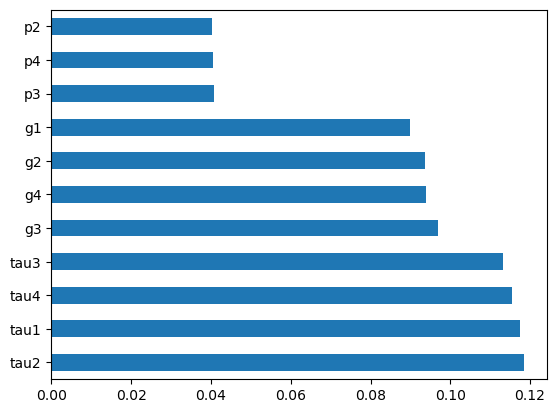

In [64]:
f_imp=pd.Series(etc.feature_importances_, index=x.columns)
f_imp.nlargest(11).plot(kind='barh')
plt.show